In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Define the device
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
device

'/CPU:0'

In [3]:
#Define transforms and load dataset
batch_size = 32
img_height = 128
img_width = 128

train_dataset = image_dataset_from_directory(
    "/Users/my475/OneDrive/Desktop/Chandrayaan 2 OHRC Lunar Crater Dataset.v4i.yolov4pytorch - Copy",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    "/Users/my475/OneDrive/Desktop/Chandrayaan 2 OHRC Lunar Crater Dataset.v4i.yolov4pytorch - Copy",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names

# Normalize the dataset
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 59 files belonging to 2 classes.
Using 48 files for training.
Found 59 files belonging to 2 classes.
Using 11 files for validation.


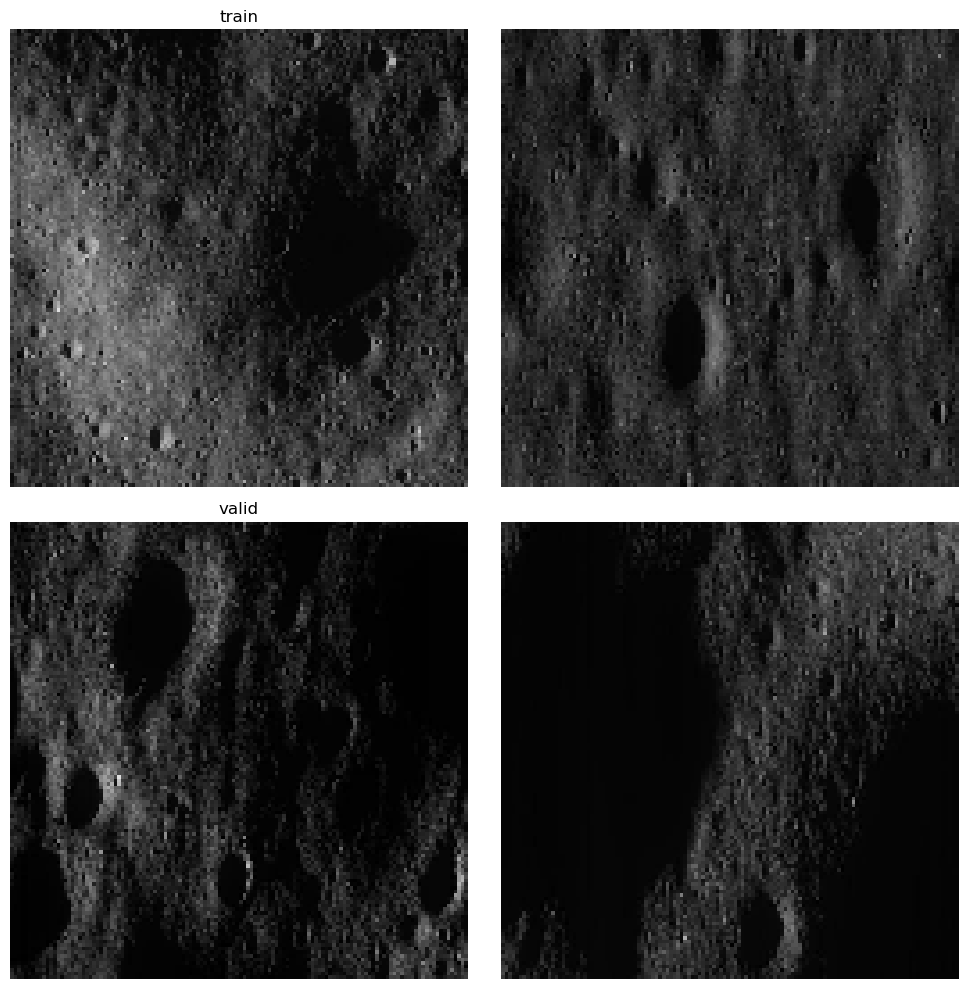

In [4]:
# Plot two images for each class
def plot_images_for_each_class(dataset, class_names, num_images=2):
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(10, 10))
    axes = axes.flatten()
    for i, class_name in enumerate(class_names):
        class_images = []
        for images, labels in dataset:
            for img, label in zip(images, labels):
                if class_names[label] == class_name:
                    class_images.append(img.numpy())
                    if len(class_images) == num_images:
                        break
            if len(class_images) == num_images:
                break
        for j in range(num_images):
            axes[i * num_images + j].imshow(class_images[j])
            axes[i * num_images + j].axis('off')
            if j == 0:
                axes[i * num_images + j].set_title(class_name)
    plt.tight_layout()
    plt.show()

plot_images_for_each_class(train_dataset, class_names)

In [5]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Summarize the model
model.summary()

C:\Users\my475\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      29,491,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,512,130 (112.58 MB)

 Trainable params: 29,512,130 (112.58 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 984ms/step - accuracy: 0.7396 - loss: 1.8292 - val_accuracy: 1.0000 - val_loss: 5.0068e-06
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.7500 - loss: 2.7132 - val_accuracy: 0.0000e+00 - val_loss: 4.1308
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.2500 - loss: 2.8577 - val_accuracy: 1.0000 - val_loss: 0.3149
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.7639 - loss: 0.4755 - val_accuracy: 1.0000 - val_loss: 0.0740
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.7500 - loss: 0.6049 - val_accuracy: 1.0000 - val_loss: 0.1521
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.7604 - loss: 0.4423 - val_accuracy: 1.0000 - val_loss: 0.3825
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.8993 - loss: 0.3829 - val_accuracy: 1.0000 - val_loss: 0.4764
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - accuracy: 0.9583 - loss: 0.3518 - val_accuracy: 1.0000 - v

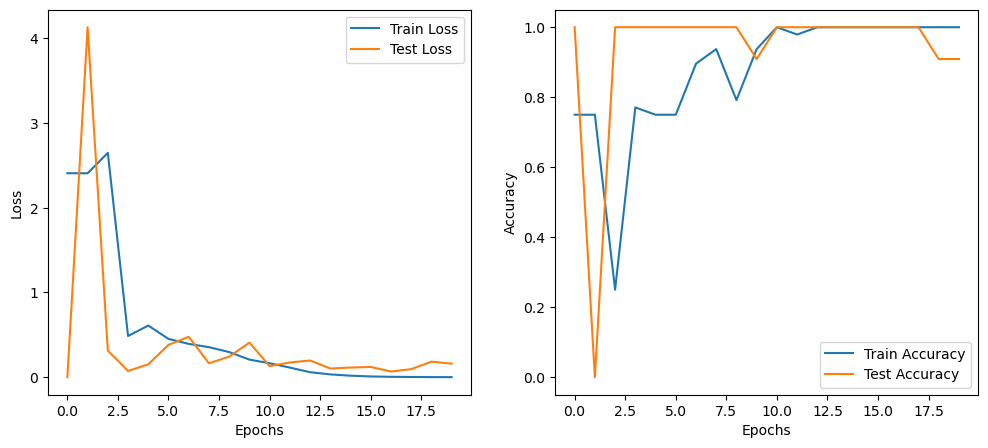

In [7]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [8]:
# Evaluate the model
val_predictions = []
val_labels = []

for images, labels in val_dataset:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(labels.numpy())

accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='weighted')
recall = recall_score(val_labels, val_predictions, average='weighted')
f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809524


C:\Users\my475\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Define the model
model1 = models.Sequential()

# First Convolutional Layer
model1.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
# MaxPooling Layer
model1.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
# MaxPooling Layer
model1.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model1.add(layers.Flatten())
# Dense Layer
model1.add(layers.Dense(512, activation='relu'))
# Output Layer
model1.add(layers.Dense(2, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Print the model summary
model1.summary()

C:\Users\my475\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,575,362 (128.08 MB)

 Trainable params: 33,575,362 (128.08 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model1.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 818ms/step - accuracy: 0.3854 - loss: 2.1090 - val_accuracy: 1.0000 - val_loss: 7.4993e-06
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.7708 - loss: 2.2205 - val_accuracy: 0.0000e+00 - val_loss: 1.6201
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.2708 - loss: 1.1990 - val_accuracy: 0.9091 - val_loss: 0.6361
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.8785 - loss: 0.6068 - val_accuracy: 1.0000 - val_loss: 0.2808
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.7292 - loss: 0.5087 - val_accuracy: 1.0000 - val_loss: 0.2711
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.7604 - loss: 0.4579 - val_accuracy: 1.0000 - val_loss: 0.3037
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.7535 - loss: 0.4420 - val_accuracy: 1.0000 - val_loss: 0.2973
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.7847 - loss: 0.3716 - val_accuracy: 1.0000 - v

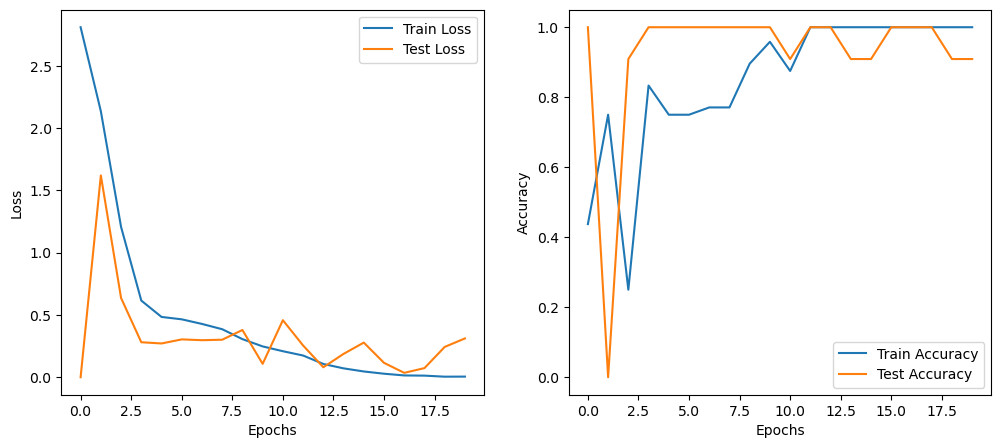

In [11]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Total Predictions: 11
Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809524


C:\Users\my475\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IndexError: list index out of range

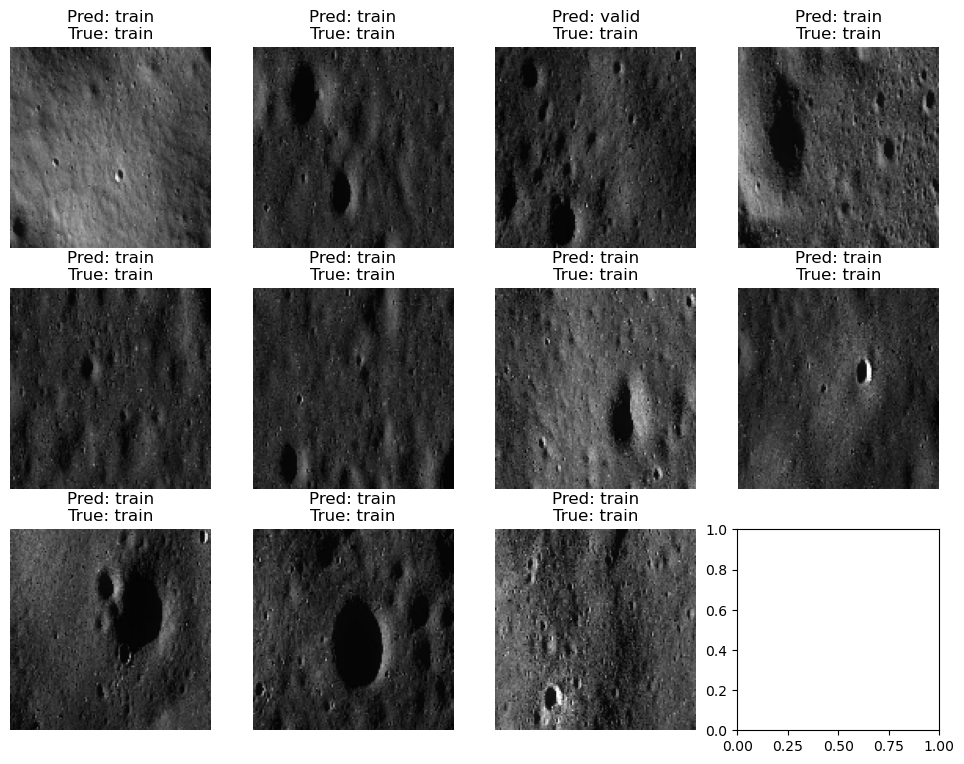

In [15]:
# Evaluate the model
val_predictions = []
val_labels = []
sample_images = []
sample_preds = []
sample_truths = []

for images, labels in val_dataset:
    preds = model1.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(labels.numpy())
    
    # Collect sample images and predictions
    sample_images.extend(images.numpy())
    sample_preds.extend(np.argmax(preds, axis=1))
    sample_truths.extend(labels.numpy())

print(f"Total Predictions: {len(sample_images)}")
    
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='weighted')
recall = recall_score(val_labels, val_predictions, average='weighted')
f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Plot sample images with predictions and ground truth
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Pred: {class_names[sample_preds[i]]}\nTrue: {class_names[sample_truths[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()